In [1]:
import json
import time
import random
from langchain_community.chat_models import ChatOllama
from langchain_core.prompts import ChatPromptTemplate

# Initialize the model and prompt
template = """Question: {question} Answer: Let's think step by step."""
prompt = ChatPromptTemplate.from_template(template)
model = ChatOllama(model="llama3.1")
chain = prompt | model

# Function to query the chatbot with rate limiting and response obfuscation
def query_chatbot_securely(queries, max_queries_per_minute=5):
    responses = []
    for i, query in enumerate(queries):
        # Rate limit: only allow max_queries_per_minute
        if i > 0 and i % max_queries_per_minute == 0:
            time.sleep(60)

        # Query the model
        response = chain.invoke({"question": query})
        response_text = response.content

        # Inject minor noise for obfuscation
        response_text += f" {random.choice(['Let’s analyze more', 'Additional insight', 'Considering other factors'])}"

        responses.append({"query": query, "response": response_text})
    return responses

# Example queries
queries = [
    "What is AI?",  
    "Tell me a joke.",  
    "How does photosynthesis work?",  
    "Explain the theory of relativity.",  
    "What are the benefits of exercise?",  
    "How does the internet work?",  
    "What is machine learning?",  
    "Tell me about quantum computing.",  
    "What are black holes?",  
    "Describe the water cycle.",  
    "How do vaccines work?",  
    "What is blockchain technology?",  
    "Explain the greenhouse effect.",  
    "What is the difference between weather and climate?",  
    "How does a computer virus spread?",  
    "What are the main functions of the human brain?",  
    "What is the significance of the Turing test?",  
    "How do plants grow?",  
    "What is the purpose of a resume?",  
    "Explain Newton's laws of motion.",  
    "What are the stages of cellular respiration?",  
    "Tell me about the Great Wall of China.",  
    "How do economies work?",  
    "What is the role of DNA in genetics?",  
    "What are the different types of renewable energy?",  
    "What is the significance of the Fibonacci sequence?",  
    "Explain the concept of supply and demand.",  
    "What is the function of the liver?",  
    "How do electric cars work?",  
    "What is the history of the internet?",  
    "Describe the structure of an atom.",  
    "How do we measure time?",  
    "What are the effects of climate change?",  
    "What is the importance of biodiversity?",  
    "Explain the principle of relativity in simple terms.",  
    "What are the causes of deforestation?",  
    "What is social media?",  
    "How does gravity work?",  
    "What are the health benefits of meditation?",  
    "What is the human genome project?",  
    "How do smartphones work?",  
    "What are the effects of pollution?",  
    "What is the difference between a hypothesis and a theory?",  
    "How does the electoral system work?",  
    "What is an ecosystem?",  
    "How do cryptocurrencies work?",  
    "What is artificial intelligence?",  
    "Explain the process of evolution.",  
    "What is a neural network?",  
    "What are the main types of clouds?",  
    "How does a camera work?",  
    "What are the principles of design?",  
    "What is the significance of the Scientific Method?",  
    "How does a magnet work?",  
    "What are the layers of the Earth?",  
    "What is the process of photosynthesis?",  
    "How does the stock market work?",  
    "What are the benefits of reading?",  
    "How does sound travel?",  
    "What is the role of mitochondria?",  
    "What is the history of vaccines?",  
    "What are the causes of earthquakes?",  
    "How does a solar panel work?",  
    "What is the importance of financial literacy?",  
    "Explain the concept of time zones.",  
    "What is the significance of the Magna Carta?",  
    "How do wind turbines generate electricity?",  
    "What are the main causes of global warming?",  
    "How does a combustion engine work?",  
    "What is the importance of critical thinking?",  
    "How do you write a business plan?",  
    "What are the key components of a healthy diet?",  
    "What is the process of DNA replication?",  
    "What are the main types of financial markets?",  
    "How do you conduct a scientific experiment?",  
    "What is the purpose of the United Nations?",  
    "Explain the concept of peer pressure.",  
    "What is the role of the kidneys?",  
    "How does a hydraulic system work?",  
    "What are the components of a computer system?",  
    "What is the significance of the civil rights movement?",  
    "What is a feedback loop in ecology?",  
    "How do you create a website?",  
    "What are the effects of overfishing?",  
    "How does the brain process information?",  
    "What is the function of the circulatory system?",  
    "What are the basic principles of economics?",  
    "How do solar eclipses occur?",  
    "What is the significance of cultural diversity?",  
    "What are the causes of poverty?",  
    "How does a refrigerator work?",  
    "What is the role of enzymes in the body?",  
    "What are the different types of art?",  
    "What is the importance of community service?",  
    "How does an optical fiber work?",  
    "What are the impacts of social inequality?",  
    "What is the significance of the Bill of Rights?",  
    "How do you build a successful team?",  
    "What is the process of natural selection?",  
    "What are the main features of a democracy?",  
    "How do we define happiness?",  
    "What is the role of advertising in society?",  
    "What are the characteristics of living organisms?",  
    "How do you manage stress effectively?",  
    "What is the process of carbon cycling?",  
    "What is the significance of the moon landing?",  
    "How do you write an effective essay?",  
    "What are the advantages of teamwork?",  
    "How does the human eye work?",  
    "What is the importance of education?",  
    "What is the role of technology in modern life?",  
    "How do you create a marketing strategy?",  
    "What are the basic principles of physics?",  
    "What is the significance of the theory of evolution?",  
    "How do you develop a business idea?",  
    "What are the causes of climate change?",  
    "How does a vaccine work?",  
    "What is the importance of ethics in business?",  
    "What are the characteristics of a healthy relationship?",  
    "How do you stay motivated?",  
    "What is the impact of globalization?",  
    "What is the significance of the Olympic Games?",  
    "How do you solve a math problem?",  
    "What are the effects of technology on communication?",  
    "How does climate affect biodiversity?",  
    "What is the importance of mental health?",  
    "How do you conduct market research?",  
    "What are the challenges of urbanization?",  
    "What is the significance of the Renaissance?",  
    "How do you prepare for a job interview?",  
    "What are the benefits of volunteering?",  
    "What is the role of government in society?",  
    "How does music affect our emotions?",  
    "What is the importance of conservation?",  
    "How do you manage your time effectively?",  
    "What are the impacts of artificial intelligence?",  
    "What is the role of the media in society?",  
    "How do you handle conflict?",  
    "What is the significance of diversity in the workplace?",  
    "How does cultural heritage shape identity?",  
    "What are the causes of addiction?",  
    "How do you practice self-care?",  
    "What is the importance of sports in society?",  
    "How does a computer network work?",  
    "What are the characteristics of a good leader?",  
    "How do you set goals effectively?",  
    "What is the role of non-profits in society?",  
    "How does the body maintain homeostasis?",  
    "What are the challenges of sustainable development?",  
    "What is the importance of personal finance?",  
    "How do you effectively communicate ideas?",  
    "What are the characteristics of effective teams?",  
    "How does language influence thought?",  
    "What is the role of art in society?",  
    "How do you create a successful project?",  
    "What are the impacts of climate on agriculture?",  
    "How does social media influence behavior?",  
    "What is the significance of historical events?",  
    "How do you conduct a needs assessment?",  
    "What are the causes of species extinction?",  
    "How does exercise affect mental health?",  
    "What is the role of parents in education?",  
    "How do you create an effective resume?",  
    "What are the impacts of poverty on health?",  
    "How does technology change the job market?",  
    "What is the significance of scientific discoveries?",  
    "How do you build effective relationships?",  
    "What are the advantages of learning a second language?",  
    "How does culture influence behavior?",  
    "What is the importance of self-reflection?",  
    "How do you develop critical thinking skills?",  
    "What are the effects of media on society?",  
    "How does peer pressure affect decisions?",  
    "What is the role of government in public health?",  
    "How do you manage change in an organization?",  
    "What are the characteristics of successful entrepreneurs?",  
    "How does nature affect mental well-being?",  
    "What is the significance of human rights?",  
    "How do you create a positive work environment?",  
    "What are the causes of unemployment?",  
    "How does art reflect culture?",  
    "What is the importance of lifelong learning?",  
    "How do you set priorities effectively?",  
    "What are the impacts of technological advancement?",  
    "How does culture shape values?",  
    "What is the significance of environmental sustainability?",  
    "How do you foster creativity?",  
    "What are the characteristics of effective communication?",  
    "How does public speaking influence leadership?",  
    "What is the role of technology in education?",  
    "How do you conduct effective meetings?",  
    "What are the effects of work-life balance?",  
    "How does community engagement benefit society?",  
    "What is the significance of youth empowerment?",  
    "How do you practice active listening?",  
    "What are the challenges of remote work?",  
    "How does nutrition impact health?",  
    "What is the importance of cultural awareness?",  
    "How do you develop resilience?",  
    "What are the effects of discrimination?",  
    "How does creativity influence innovation?",  
    "What is the significance of teamwork?",  
    "How do you manage your emotions effectively?",  
    "What are the benefits of cultural exchange?",  
    "How does technology impact privacy?",  
    "What is the role of philanthropy in society?",  
    "How do you stay organized?",  
    "What are the characteristics of successful leaders?",  
    "How does motivation influence performance?",  
    "What is the significance of historical context?",  
    "How do you build a strong network?",  
    "What are the impacts of economic inequality?",  
    "How does childhood development affect adulthood?",  
    "What is the importance of social justice?",  
    "How do you create an inclusive environment?",  
    "What are the benefits of mindfulness?",  
    "How does communication shape relationships?",  
    "What is the significance of cultural traditions?",  
    "How do you handle failure?",  
    "What are the causes of mental health issues?",  
    "How does collaboration enhance productivity?",  
    "What is the importance of empathy?",  
    "How do you create effective goals?",  
    "What are the characteristics of effective leaders?",  
    "How does conflict resolution improve relationships?",  
    "What is the significance of art in education?",  
    "How do you practice gratitude?",  
    "What are the impacts of social networks?",  
    "How does research influence policy?",  
    "What is the importance of personal branding?",  
    "How do you develop a strong work ethic?",  
    "What are the effects of globalization on culture?",  
    "How does self-awareness affect personal growth?",  
    "What is the significance of teamwork in sports?",  
    "How do you build trust in relationships?",  
    "What are the characteristics of a healthy work culture?",  
    "How does volunteering benefit communities?",  
    "What is the importance of critical analysis?",  
    "How do you develop emotional intelligence?",  
    "What are the impacts of childhood experiences on adulthood?",  
    "How does public speaking enhance communication skills?",  
    "What is the significance of global citizenship?",  
    "How do you cultivate a growth mindset?",  
    "What are the effects of advertising on behavior?",  
    "How does cultural identity influence decisions?",  
    "What is the importance of ethical decision-making?",  
    "How do you manage expectations effectively?",  
    "What are the impacts of technology on education?",  
    "How does effective communication improve teamwork?",  
    "What is the significance of diversity in education?",  
    "How do you build resilience in children?",  
    "What are the effects of environmental degradation?",  
    "How does physical health impact mental health?",  
    "What is the importance of strategic planning?",  
    "How do you create a successful marketing campaign?",  
    "What are the impacts of stress on health?",  
    "How does positive reinforcement influence behavior?",  
    "What is the significance of mentorship?",  
    "How do you encourage innovation in teams?",  
    "What are the characteristics of an effective mentor?",  
    "How does financial literacy impact personal success?",  
    "What is the importance of work-life harmony?",  
    "How do you create a vision statement?",  
    "What are the effects of cultural shock?",  
    "How does collaboration foster creativity?",  
    "What is the significance of historical preservation?",  
    "How do you navigate workplace politics?",  
    "What are the benefits of cultural competency?",  
    "How does self-discipline influence success?",  
    "What is the importance of teamwork in project management?",  
    "How do you effectively manage a team?",  
    "What are the characteristics of a successful project?",
    # Add more diverse queries
]

# Record chatbot responses securely
responses = query_chatbot_securely(queries)

# Save responses to a file
with open("secure_chatbot_responses.json", "w") as f:
    json.dump(responses, f)


/tmp/ipykernel_1523519/517324101.py:10: LangChainDeprecationWarning: The class `ChatOllama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import ChatOllama``.
  model = ChatOllama(model="llama3.1")


In [2]:
import json
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
import numpy as np
import pickle

# Load the recorded responses with differential privacy
with open("secure_chatbot_responses.json", "r") as f:
    data = json.load(f)

# Add noise for differential privacy
X = [item["query"] for item in data]
y = [item["response"] for item in data]
y = [f"{text} {random.choice(['Another thought', 'Considering other elements'])}" for text in y]

# Shuffle data for privacy
X, y = shuffle(X, y, random_state=42)

# Vectorize the input queries with limited feature set for obfuscation
vectorizer = CountVectorizer(max_features=500)
X_vectorized = vectorizer.fit_transform(X)

# Train a simple surrogate model
model = LogisticRegression()
model.fit(X_vectorized, y)

# Save the surrogate model and vectorizer
with open("secure_surrogate_model.pkl", "wb") as f:
    pickle.dump(model, f)
with open("secure_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)


In [5]:
import pickle
import json
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from langchain_community.chat_models import ChatOllama
from langchain_core.prompts import ChatPromptTemplate

# Load the surrogate model and vectorizer
with open("secure_surrogate_model.pkl", "rb") as f:
    surrogate_model = pickle.load(f)
with open("secure_vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)

# Initialize the original chatbot model and prompt
template = """Question: {question} Answer: Let's think step by step."""
prompt = ChatPromptTemplate.from_template(template)
model = ChatOllama(model="llama3.1")
chain = prompt | model

# Function to get responses from the surrogate model
def get_surrogate_response(query):
    query_vectorized = vectorizer.transform([query])
    response = surrogate_model.predict(query_vectorized)
    return response[0]

# Example evaluation with obfuscation and similarity filtering
test_queries = [
    # Personal Development and Success
    "How can you improve your time management skills?",
    "What are effective strategies for achieving goals?",
    "How does mindfulness contribute to personal success?",
    "Why is self-reflection important in personal growth?",
    "How can you overcome procrastination?",
    "What role does resilience play in achieving success?",
    "How can journaling help in self-improvement?",
    "What is the impact of setting SMART goals?",
    "Why is lifelong learning important for personal growth?",
    "How do you develop a growth mindset?",

    # Teamwork and Leadership
    "How do you resolve conflicts within a team?",
    "What are the qualities of a good leader?",
    "How do you build trust among team members?",
    "What are the key principles of servant leadership?",
    "How does diversity improve teamwork?",
    "What are effective techniques for motivating a team?",
    "How do you handle criticism as a team leader?",
    "What are the characteristics of high-performing teams?",
    "How can team-building activities improve productivity?",
    "What is the role of empathy in leadership?",

    # Education and Learning
    "How does technology enhance education?",
    "What are effective study techniques for students?",
    "Why is critical thinking important in education?",
    "How can teachers promote creativity in the classroom?",
    "What is the impact of online learning on education?",
    "How can students improve their focus while studying?",
    "What are the benefits of collaborative learning?",
    "How does education influence career opportunities?",
    "What are strategies to overcome learning challenges?",
    "How can gamification improve learning outcomes?",

    # Health and Wellness
    "What are the benefits of regular exercise?",
    "How does stress affect physical health?",
    "What are effective ways to improve mental health?",
    "How does sleep impact overall well-being?",
    "What are the advantages of maintaining a balanced diet?",
    "How can you cultivate a positive mindset?",
    "What are strategies to manage anxiety?",
    "Why is hydration important for health?",
    "How do hobbies contribute to mental well-being?",
    "What is the importance of social connections for health?",

    # Technology and Innovation
    "How does AI impact the future of work?",
    "What are the ethical implications of AI?",
    "How can blockchain revolutionize industries?",
    "What are the advantages of 5G technology?",
    "How does automation affect job opportunities?",
    "What are the challenges of implementing IoT?",
    "How does cybersecurity protect digital assets?",
    "What is the role of big data in decision-making?",
    "How can renewable energy technologies be improved?",
    "What are the implications of quantum computing?",

    # Society and Culture
    "How does culture influence communication?",
    "What are the benefits of cultural diversity?",
    "How does media shape public opinion?",
    "What are the effects of globalization on society?",
    "How can we preserve endangered languages?",
    "Why is cultural heritage important?",
    "How does social media affect mental health?",
    "What is the role of art in society?",
    "How does language influence thought?",
    "What are strategies to reduce cultural bias?",

    # Environment and Sustainability
    "What are effective ways to combat climate change?",
    "How can individuals reduce their carbon footprint?",
    "What is the impact of deforestation on biodiversity?",
    "How can cities become more sustainable?",
    "What are the benefits of renewable energy?",
    "How does plastic pollution affect marine life?",
    "What are the advantages of green buildings?",
    "How does recycling contribute to environmental health?",
    "What is the role of technology in conservation?",
    "How can businesses promote sustainability?",

    # Philosophy and Ethics
    "What is the importance of ethics in decision-making?",
    "How does philosophy shape human understanding?",
    "What are the key principles of utilitarianism?",
    "How do moral values influence behavior?",
    "What is the role of free will in human actions?",
    "How does existentialism explore human purpose?",
    "What are the ethical challenges of scientific research?",
    "How do cultural norms affect ethical perceptions?",
    "What is the relationship between justice and fairness?",
    "How does ethics influence leadership?",

    # History and Politics
    "What are the causes of major historical revolutions?",
    "How did World War II shape the modern world?",
    "What is the significance of ancient civilizations?",
    "How do political ideologies influence governance?",
    "What is the impact of colonization on modern societies?",
    "How does democracy promote individual freedom?",
    "What are the lessons learned from the Cold War?",
    "How has globalization changed political dynamics?",
    "What is the role of international organizations in peacekeeping?",
    "How does history influence cultural identity?",

    # Miscellaneous
    "What are the benefits of volunteering?",
    "How does humor impact human relationships?",
    "What is the role of curiosity in innovation?",
    "How do traditions shape societal values?",
    "What are strategies for effective public speaking?",
    "How does gratitude enhance personal happiness?",
    "What is the significance of non-verbal communication?",
    "How do hobbies contribute to personal growth?",
    "What are the benefits of reading fiction?",
    "How does music influence emotions?",

    
    # Add more queries
]

# Store responses and compute similarity scores
results = []
threshold = 0.5  # Similarity threshold for recording

for query in test_queries:
    original_response = chain.invoke({"question": query})
    original_response_text = original_response.content
    surrogate_response_text = get_surrogate_response(query)
    
    # Calculate cosine similarity
    response_vectorizer = TfidfVectorizer().fit([original_response_text, surrogate_response_text])
    vectors = response_vectorizer.transform([original_response_text, surrogate_response_text])
    similarity = cosine_similarity(vectors[0], vectors[1])[0, 0]

    # Only record results if they meet the similarity threshold
    if similarity > threshold:
        results.append({
            "query": query,
            "original_response": original_response_text,
            "surrogate_response": surrogate_response_text,
            "similarity_score": similarity
        })

# Write the full list of results to a JSON file
with open("secure_responses_comparison.json", "w", encoding="utf-8") as json_file:
    json.dump(results, json_file, ensure_ascii=False, indent=4)

print("All responses that met the threshold have been stored in secure_responses_comparison.json")


All responses that met the threshold have been stored in secure_responses_comparison.json


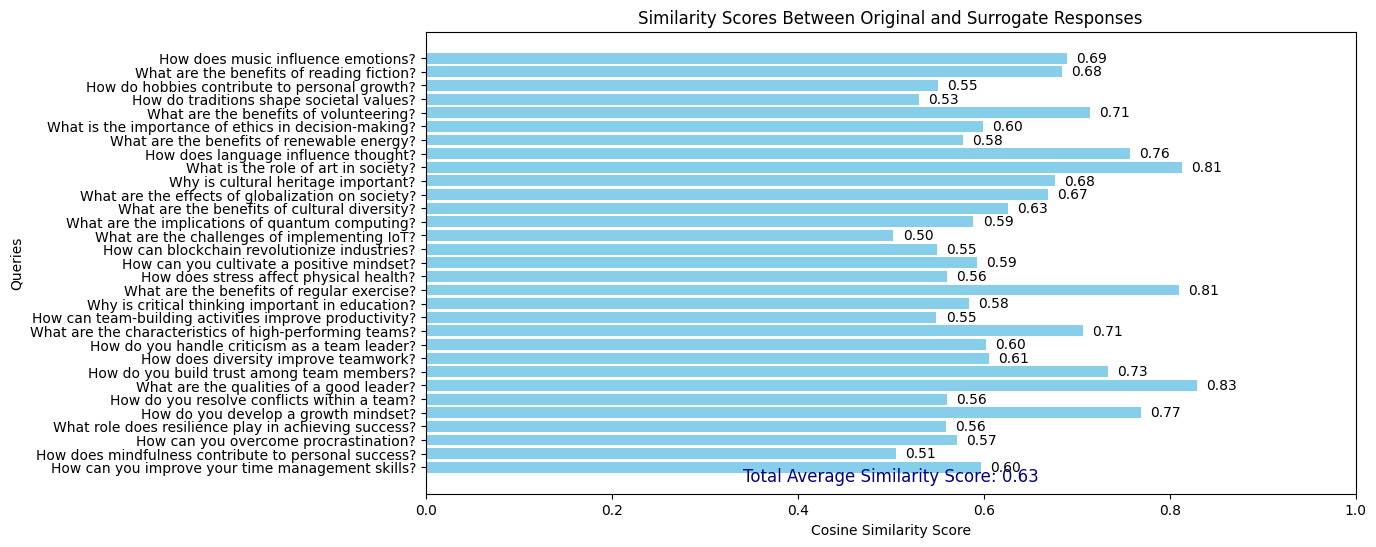

In [6]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load similarity scores from the JSON file
with open("secure_responses_comparison.json", "r", encoding="utf-8") as json_file:
    results = json.load(json_file)

# Extract queries and similarity scores
queries = [result["query"] for result in results]
similarity_scores = [result["similarity_score"] for result in results]

# Calculate the total average similarity score
average_similarity_score = np.mean(similarity_scores)

# Plotting similarity scores as a bar graph
plt.figure(figsize=(12, 6))
bars = plt.barh(queries, similarity_scores, color='skyblue')

# Add labels and title
plt.xlabel("Cosine Similarity Score")
plt.ylabel("Queries")
plt.title("Similarity Scores Between Original and Surrogate Responses")
plt.xlim(0, 1)  # Cosine similarity range is between 0 and 1

# Display the similarity score on each bar for clarity
for bar, score in zip(bars, similarity_scores):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, f"{score:.2f}", va='center')

# Display the total average score as text on the plot
plt.text(0.5, -1, f"Total Average Similarity Score: {average_similarity_score:.2f}", 
         fontsize=12, ha='center', color='darkblue')

plt.show()
